In [317]:
# Installs RDKIT
!pip install rdkit-pypi

# Installs scikit-learn
!pip install scikit-learn

# Installs imbalanced-learn
!pip install --upgrade imbalanced-learn

In [318]:
# Import necessary libraries for data manipulation, visualization, 
# machine learning, and chemical informatics processing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
# sklearn.preprocessing for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
# rdkit for handling chemical data
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
# imblearn for handling imbalanced data
from imblearn.over_sampling import SMOTE
# sklearn.ensemble for ensemble machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# sklearn.metrics for evaluating model performance
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [319]:
### Data Loading and Pre-processing ###
"""
The code below loads the dataset, encodes the 'Class' column, identifies and removes duplicate rows,
and handles missing values.
"""

"\nThe code below loads the dataset, encodes the 'Class' column, identifies and removes duplicate rows,\nand handles missing values.\n"

In [320]:
# Load the dataset
data_drug = pd.read_excel('BBB_datasets.xlsx')

In [321]:
# Encode the 'Class' column
label_encoder = LabelEncoder()
data_drug['Class_Encoded'] = label_encoder.fit_transform(data_drug['Class'])

In [322]:
# Display the first 10 rows to check the encoded column
data_drug.head(10)

,Drug Name,SMILES,Class,Class_Encoded
0,1,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)N(CC4)CCC4n(c5)...,BBB+,0
1,2,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)[C@@H]4CCCN(C)C4,BBB+,0
2,5,CC1CCN(CC1)C(=O)c(c2)ccc3n(CC=C)c(c4c23)CCN(C4...,BBB+,0
3,11,ClCCCl,BBB+,0
4,120,c1cccc(c1C23C)C(N3)Cc4c2cccc4,BBB+,0
5,180,CC(=O)C,BBB+,0
6,241,c1ccccc1,BBB+,0
7,263,OCCCC,BBB+,0
8,356,CCCCCCCC,BBB+,0
9,444,CC(C)(C)NC(C)C(=O)c1cc(Cl)ccc1,BBB+,0


In [323]:
# Display the first 10 rows to check the encoded column
data_drug.tail(10)

,Drug Name,SMILES,Class,Class_Encoded
594,ranitidine,[O-][N+](=O)\C=C(NC)\NCCSCc(o1)ccc1CN(C)C,BBB-,1
595,ridogrel,c1ccc(C(F)(F)F)cc1/C(c2cccnc2)=N\OCCCCC(=O)O,BBB-,1
596,SKF93319,CN(C)Cc1ccc(o1)CSCCNc([nH]c2)nc(=O)c2Cc(c3)ccc...,BBB-,1
597,Sulphasalazine,O=C(O)c1c(O)ccc(c1)/N=N/c2ccc(cc2)S(=O)(=O)Nc3...,BBB-,1
598,temelastine,n1cc(Br)cc(C)c1CCCCNc([nH]c2)nc(=O)c2Cc3ccc(C)nc3,BBB-,1
599,TiPr-DCKA,c1nc(C)nc(N)c1CN(C=O)C(\C)=C(SSC(C)C)\CCOC(=O)...,BBB-,1
600,TZ-14,Cc(c1)ccc(c1C)NC2=NCCN2,BBB-,1
601,zalcitabine,OC[C@@H]1CC[C@H](O1)n(c(n2)=O)ccc2N,BBB-,1
602,zidovudine,N=[N+]=NC(C1CO)CC(O1)n(c2)c(=O)[nH]c(=O)c2C,BBB-,1
603,zolpidem,C1=CC(C)=CN(C12)C(CC(=O)N(C)C)=C(N2)c(cc3)ccc3C,BBB-,1


In [324]:
# Display the dimensions of the DataFrame (number of rows, number of columns).
data_drug.shape

(604, 4)

In [325]:
# Identify and count duplicate rows in the DataFrame.
duplicate_rows_df = data_drug[data_drug.duplicated()]
# Display the number of duplicate rows found in the dataset.
duplicate_rows_df.shape

(0, 4)

In [326]:
# Handling missing values
data_drug.dropna(inplace=True)

In [327]:
# Summarizes the presence of null values in each column
data_drug.isnull().sum()

Drug Name        0
SMILES           0
Class            0
Class_Encoded    0
dtype: int64

In [328]:
### Feature Extraction from SMILES Notation ###
"""
This section extracts molecular descriptors from the SMILES notation of chemicals
using RDKit. These descriptors serve as features for machine learning models.
"""

'\nThis section extracts molecular descriptors from the SMILES notation of chemicals\nusing RDKit. These descriptors serve as features for machine learning models.\n'

In [329]:
# Select the SMILES column that contains the chemical structure notation
smiles = data_drug['SMILES']

# Create a list to hold the molecular descriptors
mol_descriptors = []

In [330]:
# List of descriptor names from the RDKit Library
descriptor_names = [desc[0] for desc in Descriptors._descList]

# Initialize the molecular descriptor calculator with the list of descriptor names
calc = MolecularDescriptorCalculator(descriptor_names)

In [331]:
# Loop through each SMILES notation in the dataset
for smile in smiles:
    # Convert the SMILES notation to a molecular object
    mol = Chem.MolFromSmiles(smile)
    if mol:  # Check if the molecule was successfully created
        # Calculate the descriptors for the molecule
        try:
            vector = calc.CalcDescriptors(mol)
            mol_descriptors.append(vector)
        except Exception:
            # Here you could pass, log the error to a file, or take other non-printing actions
            pass

In [332]:
# print list of all 200 mol descriptors
Descriptors._descList

[('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('MaxPartialCharge',
  <function rdkit.Chem.Descriptors.MaxPartialCharge(mo

In [333]:
# Extract the names of all descriptors for the DataFrame
cols_mols = [desc[0] for desc in Descriptors._descList]
# Create a DataFrame 'desc_df' using the molecular descriptors data
desc_df = pd.DataFrame(mol_descriptors, columns=cols_mols)

In [334]:
# Print the DataFrame 'desc_df' to verify its structure and content
desc_df

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,0
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,0
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,0
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,12.743300,-0.698671,12.743300,0.016984,0.161558,596.562,569.346,595.088152,202,0,...,0,0,0,0,0,0,0,0,0,0
600,4.288947,0.868296,4.288947,0.868296,0.704773,189.262,174.142,189.126597,74,0,...,0,0,0,0,0,0,0,0,0,0
601,11.451388,-0.417972,11.451388,0.020187,0.687546,211.221,198.117,211.095691,82,0,...,0,0,0,0,0,0,0,0,0,0
602,11.712620,-0.642870,11.712620,0.280483,0.480439,268.253,254.141,268.104030,102,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
# Descriptive statistics for the molecular descriptors
desc_stats = desc_df.describe()

# Print descriptive statistics
desc_stats

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.0,...,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.0,604.000000,604.000000,604.000000
mean,9.539393,-0.491767,9.540428,0.380561,0.620049,281.586803,263.184127,281.204579,104.096026,0.0,...,0.059603,0.021523,0.006623,0.003311,0.004967,0.041391,0.0,0.014901,0.304636,0.043046
std,3.643835,1.412329,3.644011,0.572806,0.176450,125.261739,118.002723,125.138103,46.963492,0.0,...,0.275760,0.145241,0.081176,0.057496,0.070359,0.199357,0.0,0.121256,1.122621,0.203130
min,0.000000,-10.472222,0.000000,0.000000,0.066417,16.043000,12.011000,16.031300,8.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.023119,-0.852431,6.023119,0.082014,0.483890,195.533250,185.219000,195.055533,74.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,11.109710,-0.261795,11.109710,0.212404,0.642945,283.407500,262.220000,283.122427,104.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,12.348824,0.330150,12.348824,0.486110,0.768165,358.303000,338.760000,357.597548,130.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,15.321994,3.000000,15.321994,9.847222,0.932398,824.972000,768.524000,824.399644,320.000000,0.0,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,16.000000,1.000000


In [336]:
### Exploratory Data Analysis (EDA) ###
"""
This section involves exploring the dataset to understand the distributions of molecular descriptors,
their importance using a Random Forest model, and correlations among them.
"""

'\nThis section involves exploring the dataset to understand the distributions of molecular descriptors,\ntheir importance using a Random Forest model, and correlations among them.\n'

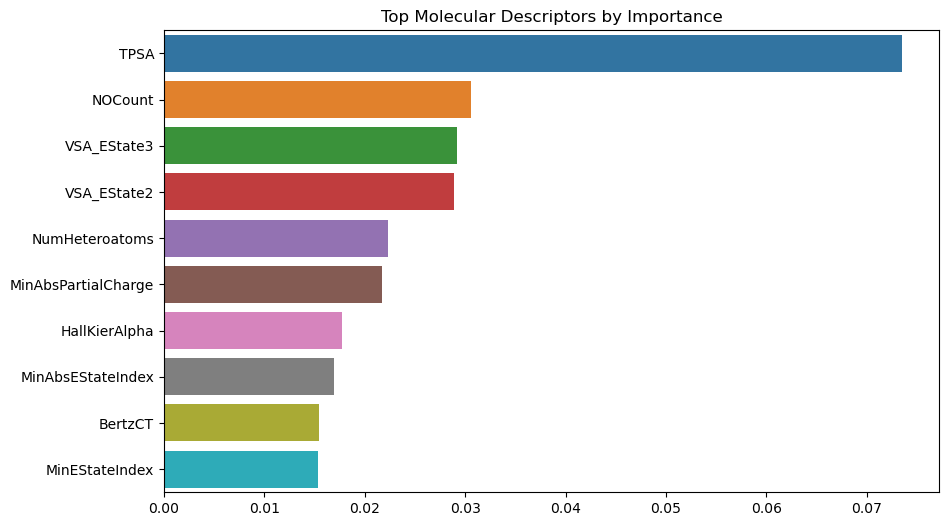

In [337]:
# Fit a simple Random Forest model for feature importance
X = desc_df
y = data_drug['Class_Encoded']
clf = RandomForestClassifier()
clf.fit(X, y)

# Visualize feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices[:10]], y=X.columns[indices[:10]]) # Top 10 features
plt.title('Top Molecular Descriptors by Importance')
plt.show()


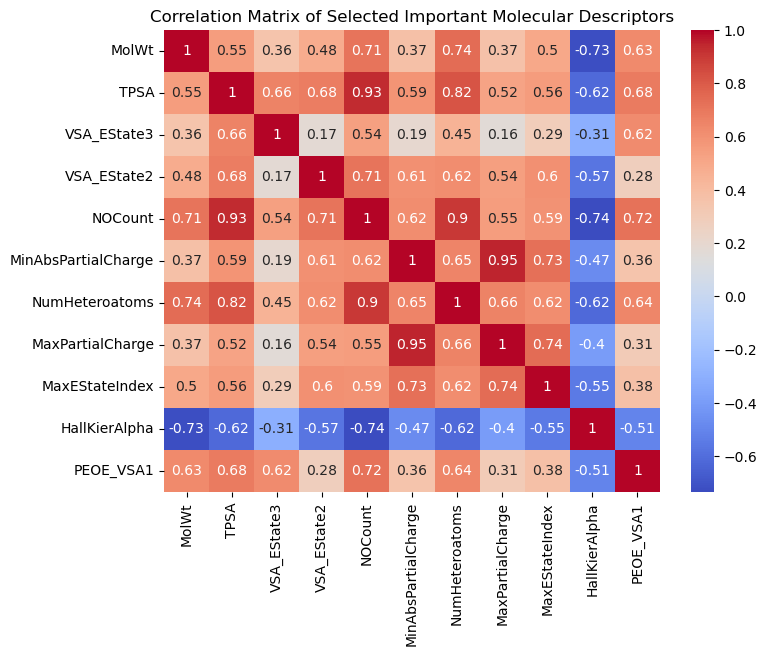

In [338]:
# This list is created after fitting the RandomForestClassifier and identifying the top features
important_descriptors = ['MolWt', 'TPSA', 'VSA_EState3', 'VSA_EState2', 'NOCount', 'MinAbsPartialCharge', 'NumHeteroatoms', 'MaxPartialCharge', 'MaxEStateIndex', 'HallKierAlpha', 'PEOE_VSA1']

# Creating a new DataFrame with only the important descriptors for correlation analysis
important_desc_df = desc_df[important_descriptors]

# Calculate correlation matrix for the selected important descriptors
corr_matrix_important = important_desc_df.corr()

# Plot heatmap for the correlation matrix of the selected important descriptors
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_important, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Important Molecular Descriptors')
plt.show()

In [339]:
# Selecting descriptors for visualization
important_descriptors = ['MolWt', 'TPSA', 'VSA_EState3', 'VSA_EState2']

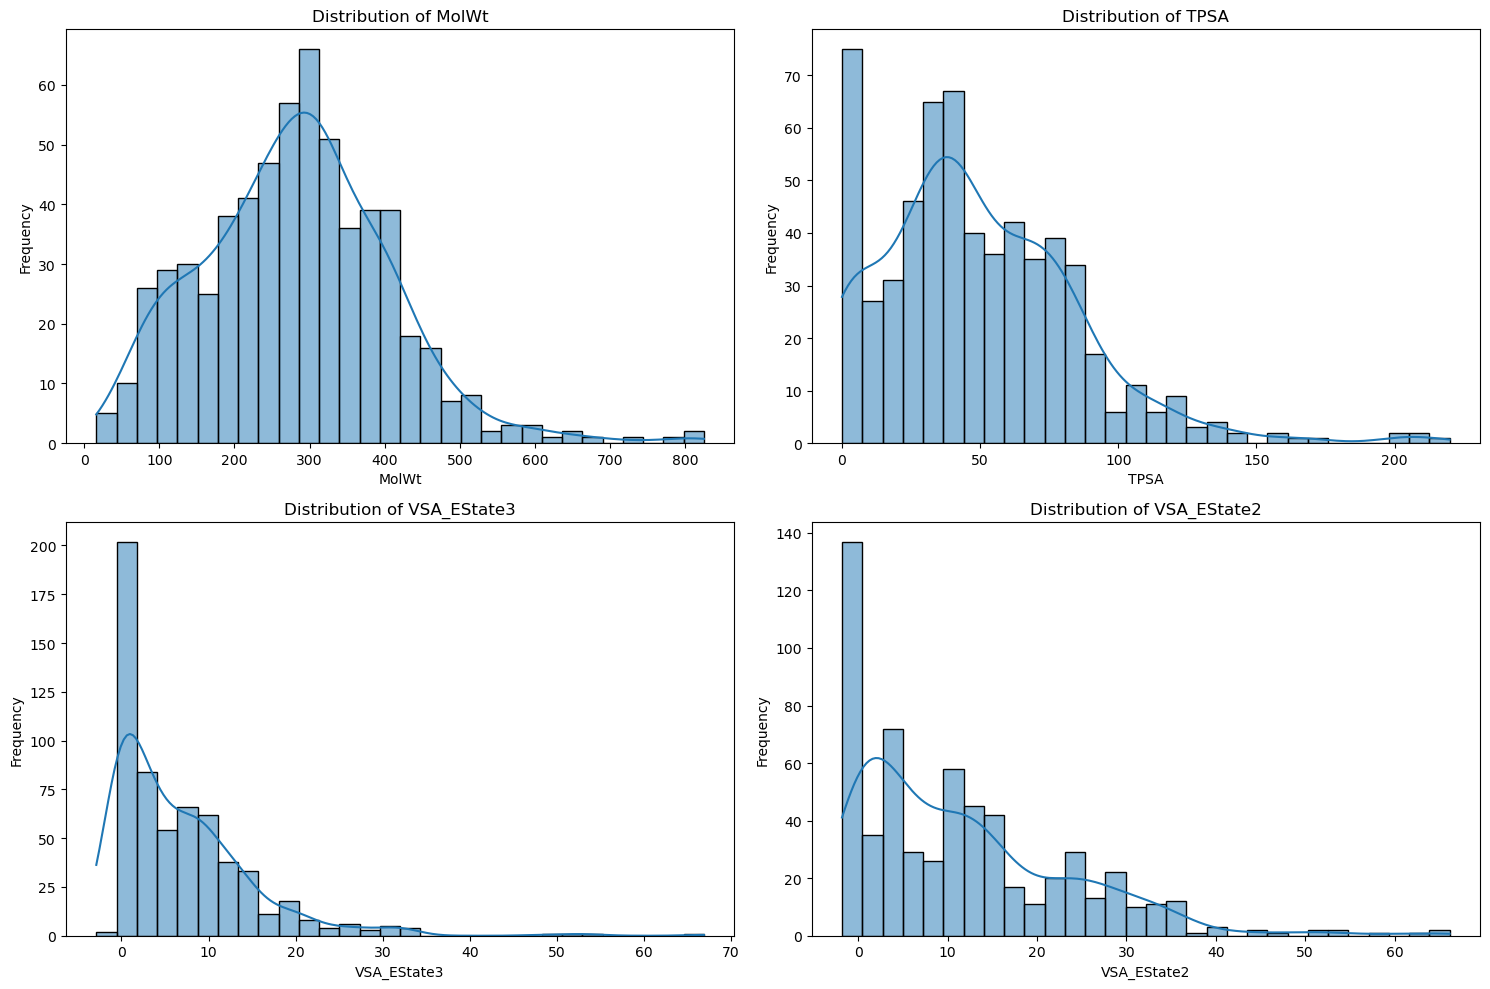

In [340]:
# Creating a new DataFrame with only the important descriptors
important_desc_df = desc_df[important_descriptors]

# Visualize the distributions of these descriptors
plt.figure(figsize=(15, 10))

for i, descriptor in enumerate(important_descriptors, 1):
    plt.subplot(2, 2, i)
    sns.histplot(important_desc_df[descriptor], bins=30, kde=True)
    plt.title(f'Distribution of {descriptor}')
    plt.xlabel(descriptor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


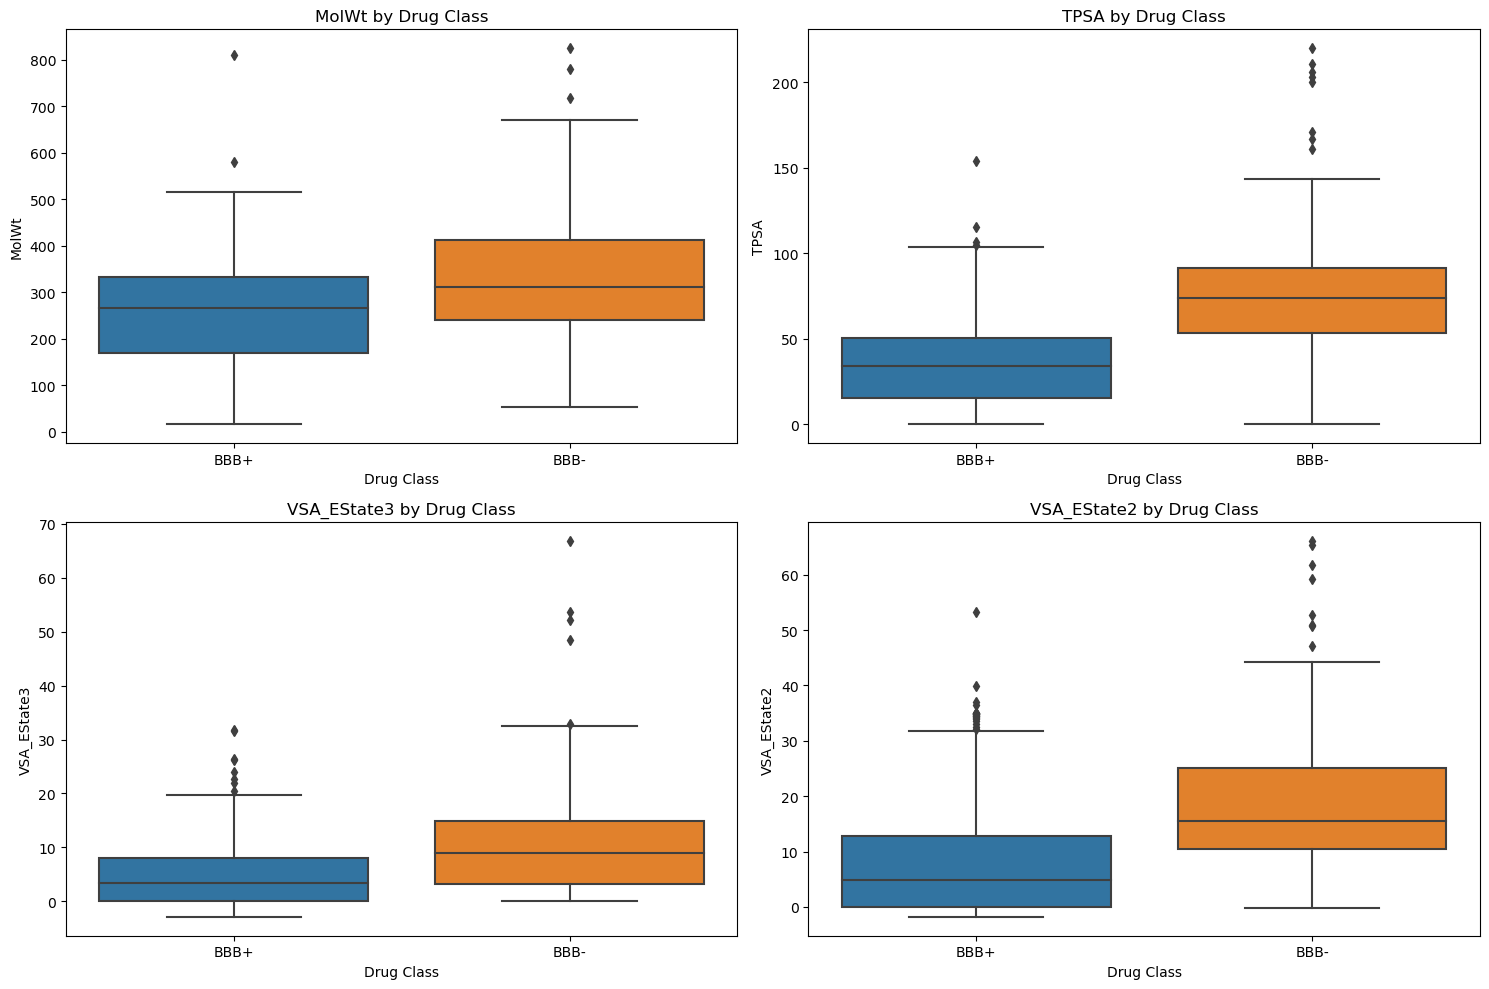

Test for MolWt:
T-statistic: -6.691872778613131, P-value: 8.761605854572059e-11

Test for TPSA:
T-statistic: -14.91152773815252, P-value: 3.9200090612926087e-38

Test for VSA_EState3:
T-statistic: -8.311498769951637, P-value: 5.16451097650753e-15

Test for VSA_EState2:
T-statistic: -9.414780049831299, P-value: 8.86011155206074e-19



In [341]:
# Selected descriptors
important_descriptors = ['MolWt', 'TPSA', 'VSA_EState3', 'VSA_EState2']

# Ensure that 'Class' is included for merging
data_drug_selected = data_drug[['Class', 'Class_Encoded']]
important_desc_df = pd.concat([data_drug_selected, desc_df[important_descriptors]], axis=1)

# Visualize the distributions of these descriptors with boxplots by Class
plt.figure(figsize=(15, 10))
for i, descriptor in enumerate(important_descriptors, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Class', y=descriptor, data=important_desc_df)
    plt.title(f'{descriptor} by Drug Class')
    plt.xlabel('Drug Class')
    plt.ylabel(descriptor)

plt.tight_layout()
plt.show()

# Statistical Analysis (T-test) for differences between Classes
for descriptor in important_descriptors:
    # Splitting the data into BBB+ and BBB- based on Class_Encoded
    data_bbb_plus = important_desc_df[important_desc_df['Class_Encoded'] == 0][descriptor]
    data_bbb_minus = important_desc_df[important_desc_df['Class_Encoded'] == 1][descriptor]
    
    # Performing T-test
    t_stat, p_value = stats.ttest_ind(data_bbb_plus, data_bbb_minus, equal_var=False)
    
    print(f'Test for {descriptor}:')
    print(f'T-statistic: {t_stat}, P-value: {p_value}\n')

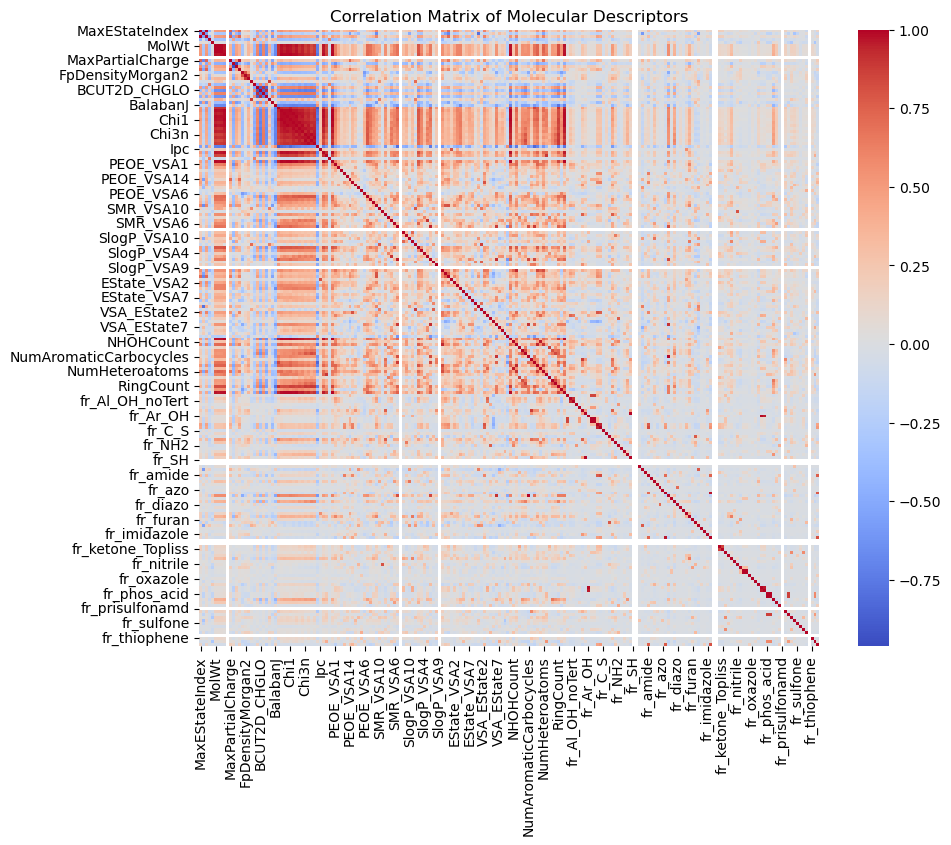

In [342]:
# Calculate correlation matrix
corr_matrix = desc_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of Molecular Descriptors')
plt.show()

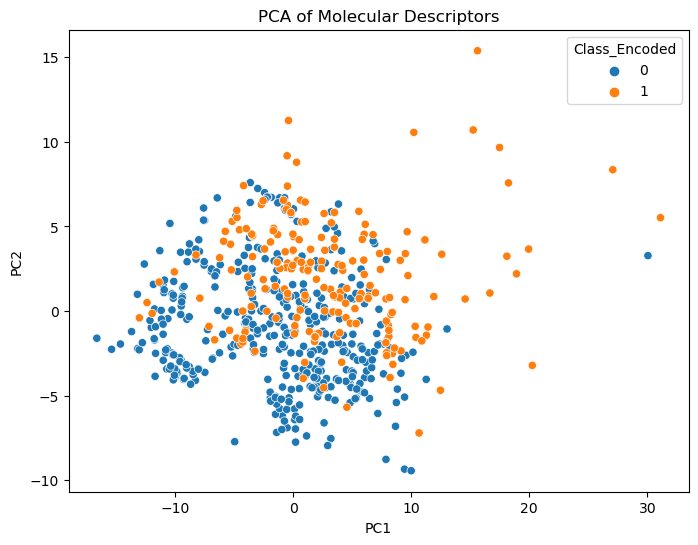

In [343]:
# Standardizing the data
scaler = StandardScaler()
desc_scaled = scaler.fit_transform(desc_df)

# PCA transformation
pca = PCA(n_components=2) # Adjust n_components based on variance ratio
principalComponents = pca.fit_transform(desc_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Visualizing PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principalDf, hue=data_drug['Class_Encoded'])
plt.title('PCA of Molecular Descriptors')
plt.show()


In [344]:
### Model Selection and Implementation ###
"""
The code below splits the data, applies SMOTE to address class imbalance,
selects models for evaluation.
"""

'\nThe code below splits the data, applies SMOTE to address class imbalance,\nselects models for evaluation.\n'

In [345]:
# Split the data into training and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    desc_df, data_drug['Class_Encoded'], test_size=0.2, random_state=42
)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verifying the new class distribution
print(f'Class distribution in the original training set: {np.bincount(y_train)}')
print(f'Class distribution in the SMOTE-resampled training set: {np.bincount(y_train_smote)}')

Class distribution in the original training set: [323 160]
Class distribution in the SMOTE-resampled training set: [323 323]


In [346]:
### Evaluation and Validation ###
"""
This section initializes several machine learning classifiers and evaluates their performance.
First, cross-validation is used to estimate the accuracy of each classifier.
Then, the classifiers are fitted on the entire training dataset and evaluates their performance on the test dataset.
"""

'\nThis section initializes several machine learning classifiers and evaluates their performance.\nFirst, cross-validation is used to estimate the accuracy of each classifier.\nThen, the classifiers are fitted on the entire training dataset and evaluates their performance on the test dataset.\n'

In [347]:
# Initialize several different classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

In [348]:
# Dictionary to hold cross-validation results
cv_results = {}

In [349]:
# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Random Forest Accuracy: 0.8762313655336911 (+/- 0.062012458069326454)
Gradient Boosting Accuracy: 0.8731425163983303 (+/- 0.05919543766525767)
Support Vector Machine Accuracy: 0.5030888491353608 (+/- 0.0075661982656293186)
Logistic Regression Accuracy: 0.5015503875968992 (+/- 0.00620155038759691)


In [350]:
# After cross-validation, fit the models to the entire training set and evaluate on the test set

In [351]:
# Dictionary to store the results of each model
model_results = {}
# Looping through each classifier in our predefined dictionary of classifiers
for name, clf in classifiers.items():
    # Fits the classifier to the SMOTE-balanced training set
    clf.fit(X_train_smote, y_train_smote)
     # Predicts the test set outcomes
    y_pred = clf.predict(X_test)
     # Calculates the accuracy of the predictions
    acc = accuracy_score(y_test, y_pred)
    # Generates a classification report
    report = classification_report(y_test, y_pred)
    # Stores the accuracy and classification report in the results dictionary
    model_results[name] = {'Accuracy': acc, 'Classification Report': report}
    # Prints the model's name, its accuracy, and classification report for the test set
    print(f"{name} Test Set Accuracy: {acc}\n")
    print(f"{name} Classification Report:\n {report}\n")

Random Forest Test Set Accuracy: 0.8016528925619835

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        79
           1       0.71      0.71      0.71        42

    accuracy                           0.80       121
   macro avg       0.78      0.78      0.78       121
weighted avg       0.80      0.80      0.80       121


Gradient Boosting Test Set Accuracy: 0.7603305785123967

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        79
           1       0.68      0.60      0.63        42

    accuracy                           0.76       121
   macro avg       0.74      0.72      0.73       121
weighted avg       0.76      0.76      0.76       121


Support Vector Machine Test Set Accuracy: 0.6528925619834711

Support Vector Machine Classification Report:
               precision    recall  f1-score  